<a href="https://colab.research.google.com/github/dclark18/MSDS_Capstone/blob/master/Capstone_A_EDA_Clark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
from io import StringIO

%matplotlib inline

import numpy as np
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

#from pathos.multiprocessing import ProcessingPool as Pool
import pandas.util.testing as tm
import multiprocessing as mp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
female_drive = 'https://drive.google.com/file/d/17fVhjvXH-ckfQM1kY_4CrQH2UDlszY-L/view?usp=sharing'

file_id = female_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
female_clean = pd.read_csv(csv_raw)
female_clean.head()
female_clean = female_clean.iloc[0:22990]
female_clean.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0     FID   Id  ...   NatnegEND  STRATUM     resid
22985     22986.0  4681.0  0.0  ...  -30.000000   2090.0 -0.640189
22986     22987.0  4682.0  0.0  ...   42.426407   2090.0 -0.444709
22987     22988.0  4683.0  0.0  ...  600.000000   2090.0 -0.017580
22988     22989.0  4684.0  0.0  ...  189.736664   2090.0 -0.114555
22989     22990.0  4685.0  0.0  ...   90.000000   2090.0 -0.290843

[5 rows x 69 columns]

In [4]:
male_drive = 'https://drive.google.com/file/d/1rNNRoeG6_SUXe1gHYK7kwg5lKYyunQrb/view?usp=sharing'

file_id = male_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
male_clean = pd.read_csv(csv_raw)
male_clean = male_clean.iloc[0:167057]
male_clean.head()
male_clean.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0     FID   Id  ...   NatnegEND  STRATUM     resid
167052    167053.0  6771.0  0.0  ...  150.000000  15187.0 -0.312966
167053    167054.0  6772.0  0.0  ...   42.426407  15187.0 -0.483855
167054    167055.0  6773.0  0.0  ...  276.586334  15187.0 -0.208582
167055    167056.0  6774.0  0.0  ...  174.928558  15187.0 -0.291362
167056    167057.0  6775.0  0.0  ...   30.000000  15187.0 -0.489409

[5 rows x 69 columns]

## Data

In [5]:
print('Female Records and fields', female_clean.shape)
print('Male Records and fields', male_clean.shape)

print("Total Missing Values - Female", female_clean.isnull().sum().sum())
print('Total Missing Values - Male', male_clean.isnull().sum().sum())

Female Records and fields (22990, 69)
Male Records and fields (167057, 69)
Total Missing Values - Female 0
Total Missing Values - Male 0


## EDA

#### Response Variable

Text(0, 0.5, 'Count')

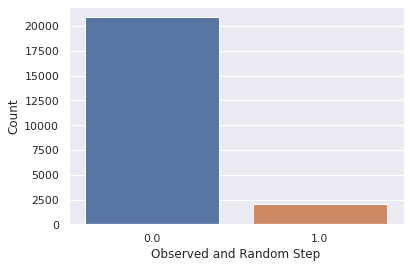

In [6]:
ax = sns.countplot(x = 'OBSERVED', data = female_clean)
ax.set_xlabel("Observed and Random Step")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

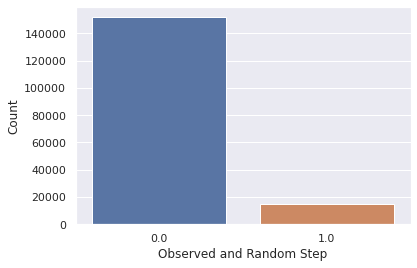

In [7]:
ax = sns.countplot(x = 'OBSERVED', data = male_clean)
ax.set_xlabel("Observed and Random Step")
ax.set_ylabel("Count")

Looking at the female vs male data and the observed value vs random state value, we are seeing that for every observed value, we will get 10 random values to test against. 

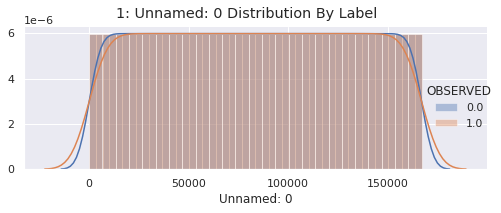

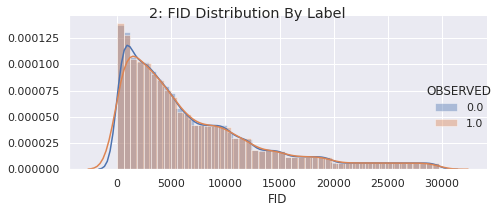

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


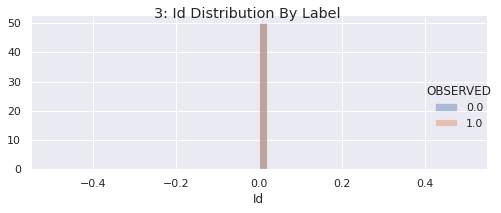

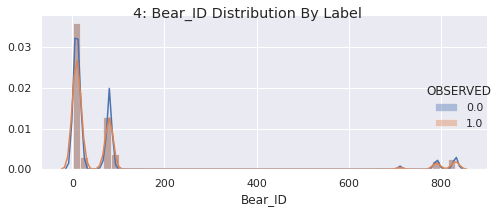

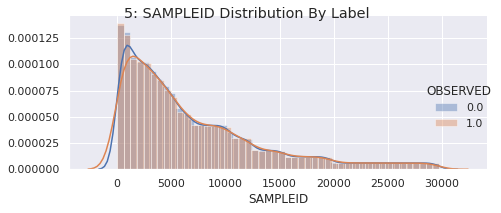

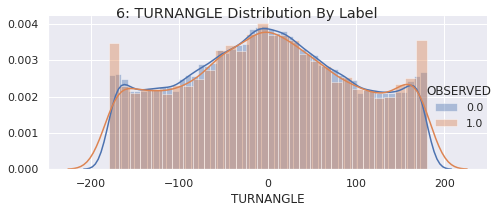

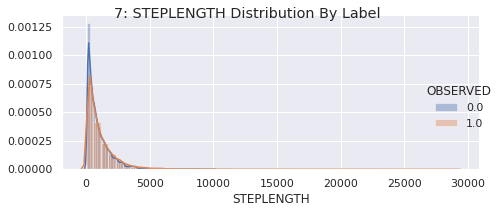

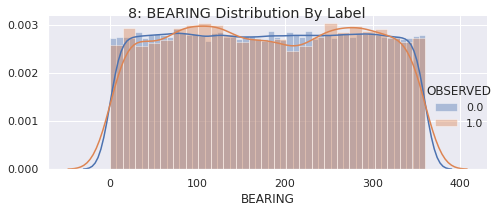

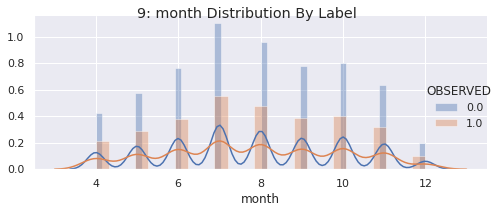

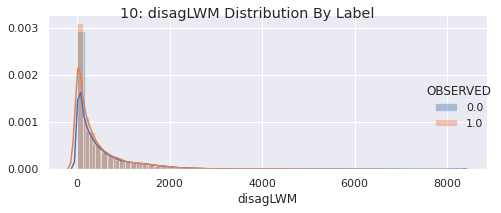

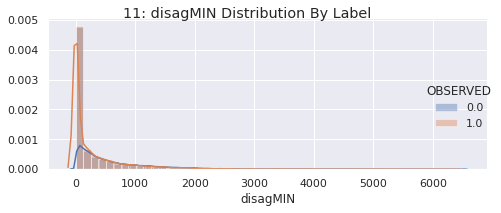

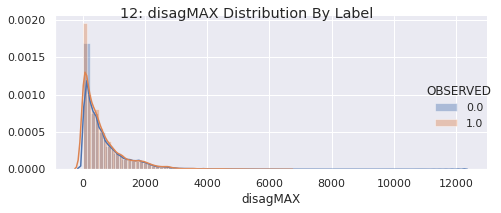

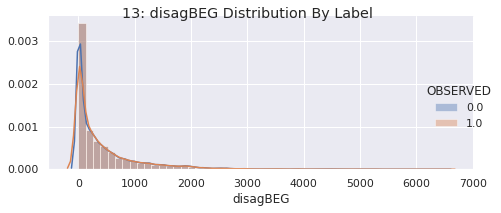

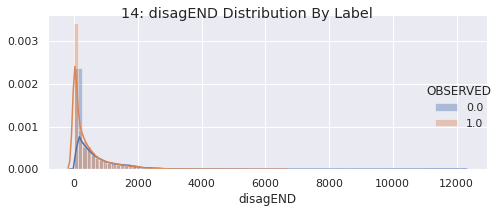

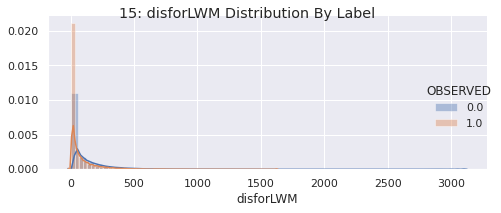

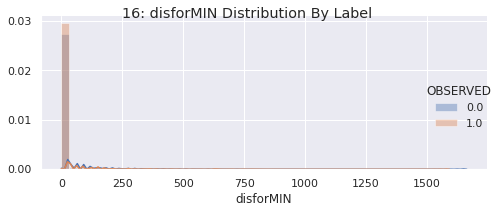

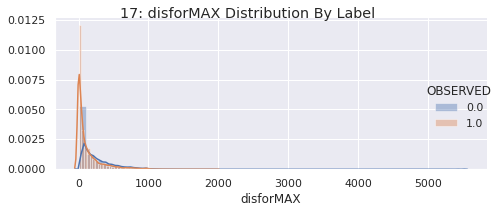

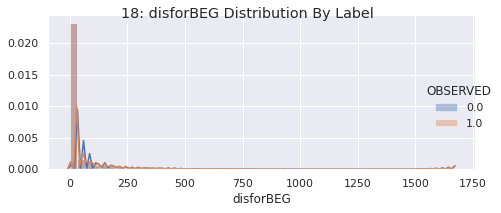

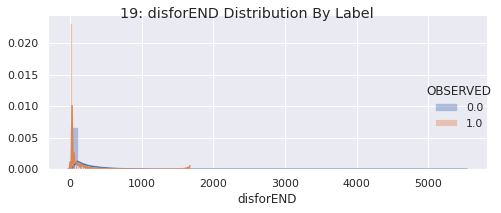

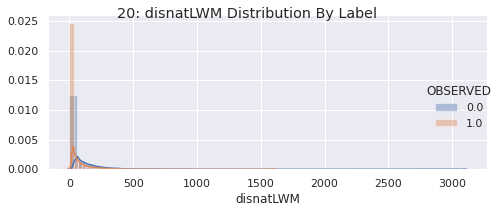

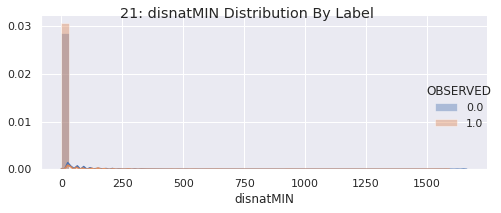

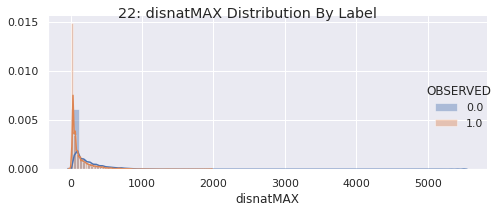

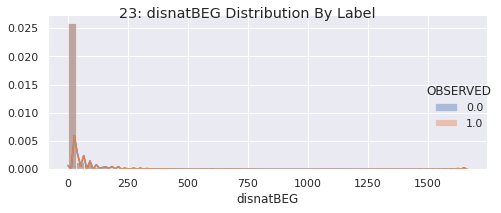

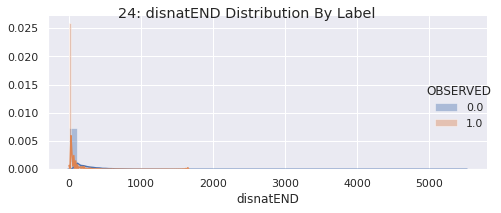

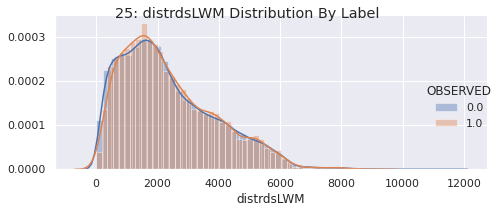

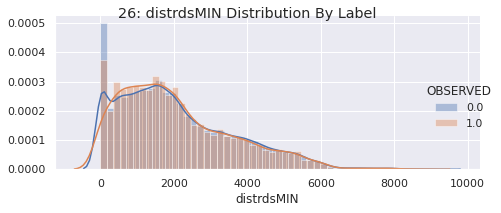

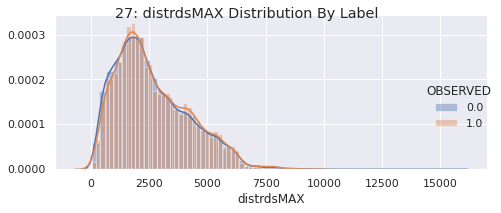

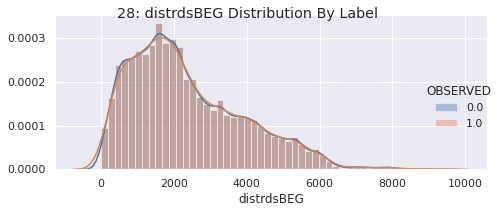

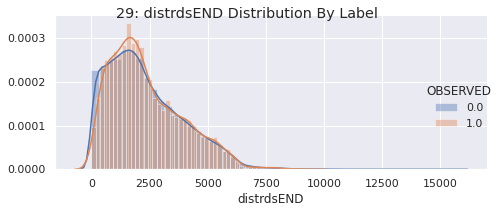

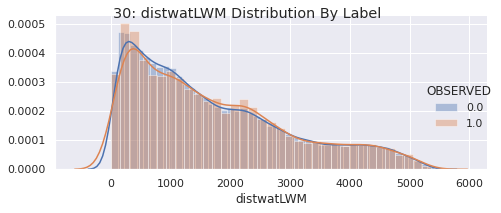

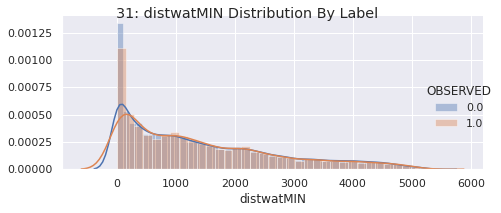

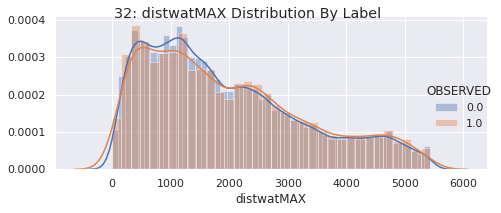

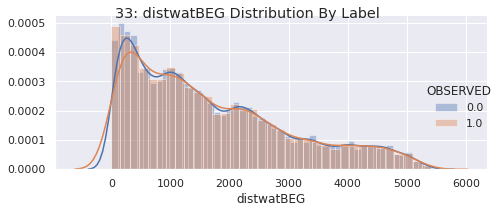

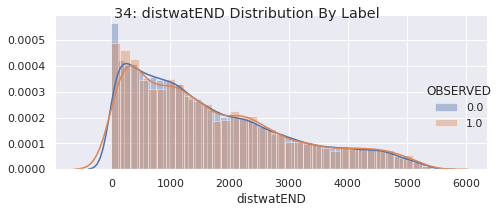

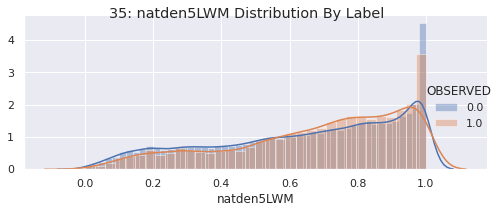

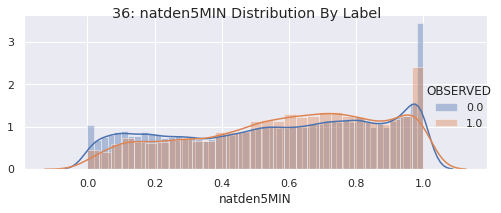

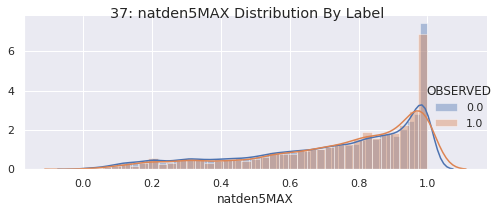

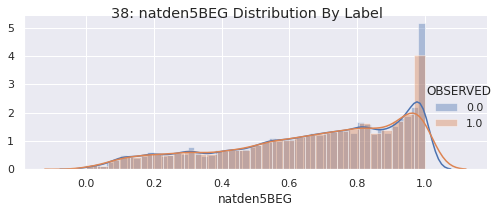

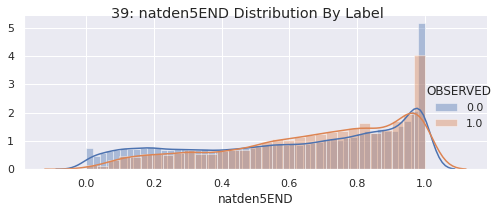

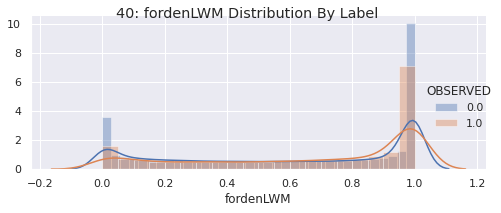

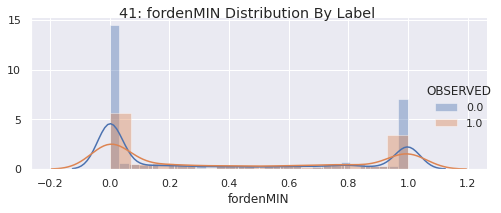

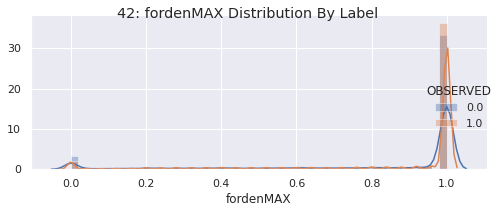

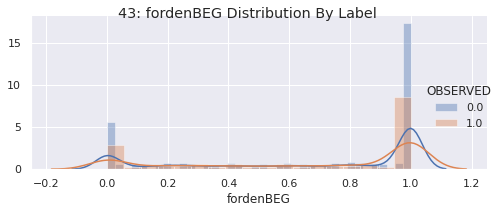

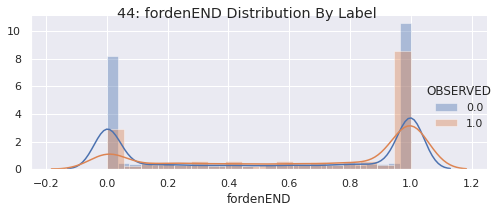

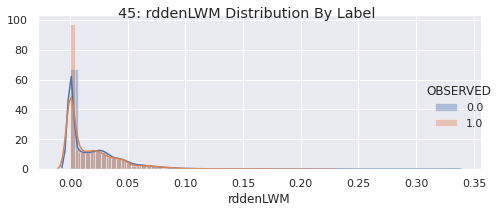

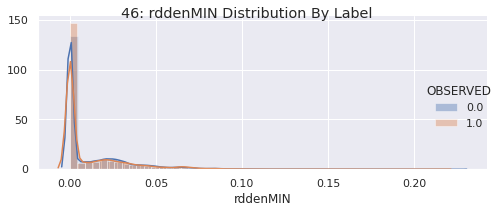

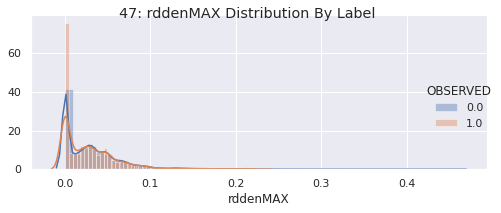

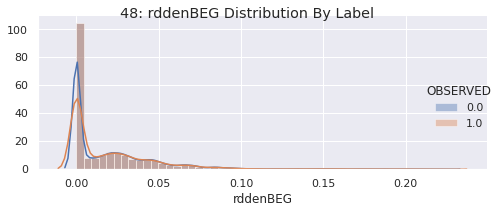

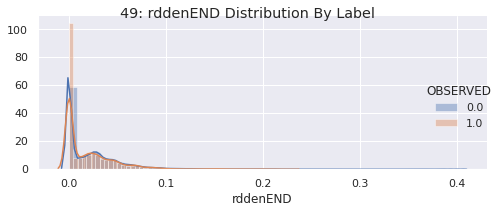

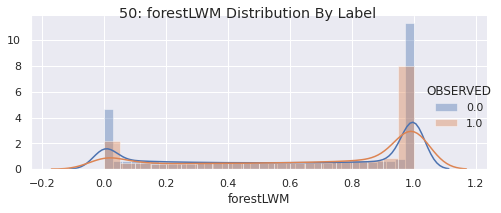

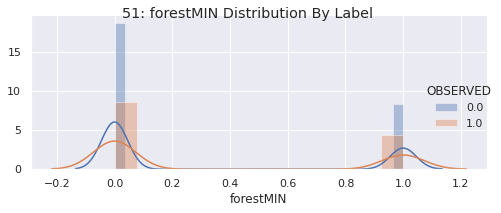

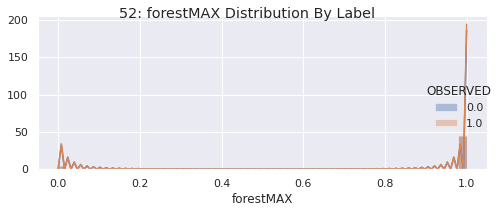

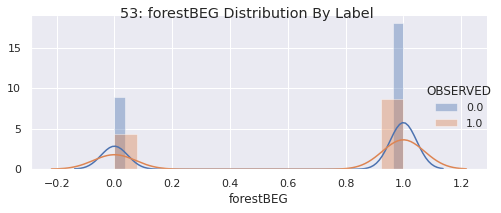

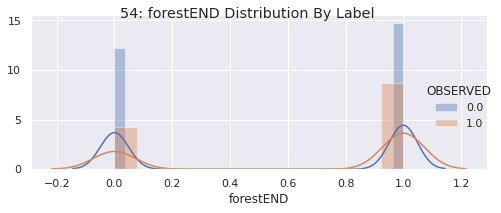

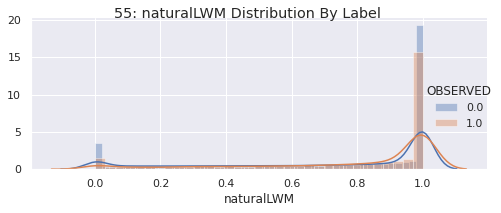

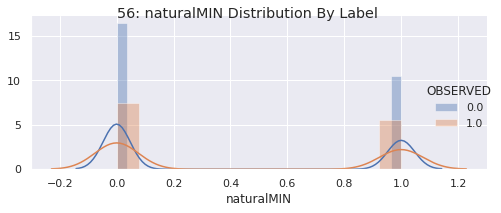

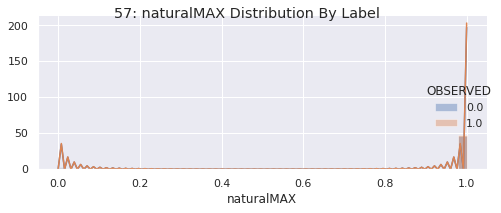

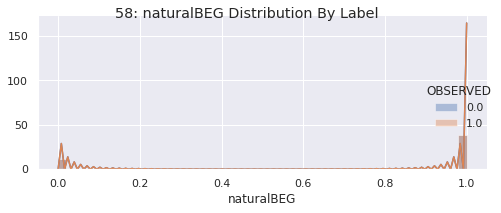

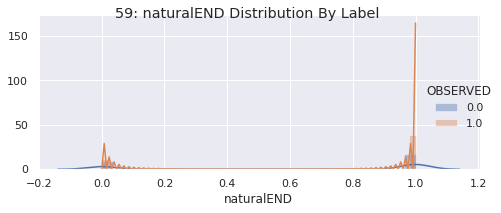

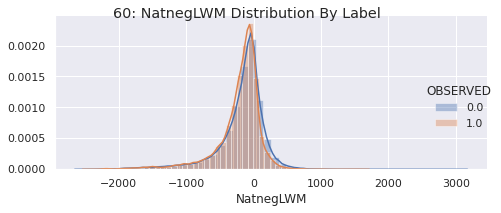

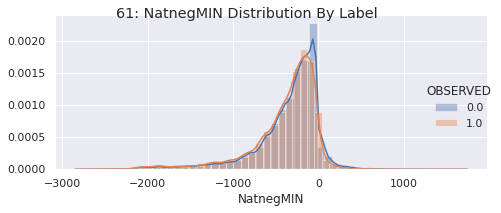

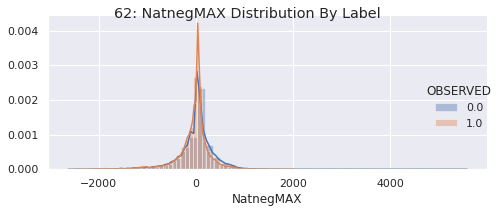

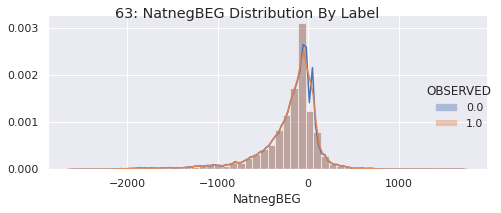

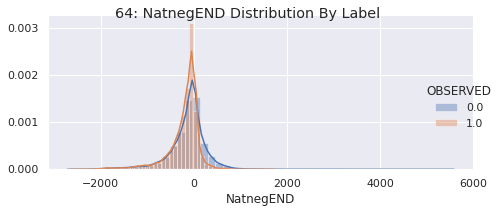

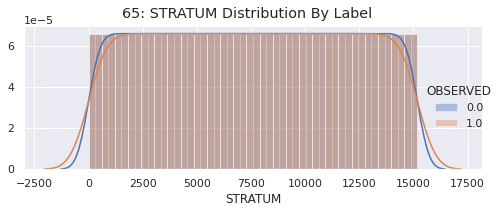

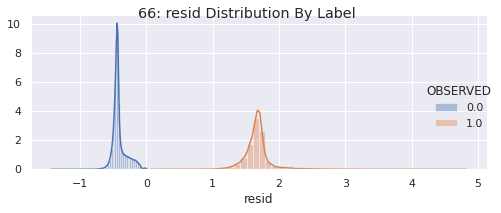

In [8]:

plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(5,5)
colnames=list(male_clean.drop(['OBSERVED'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    facet = sns.FacetGrid(male_clean, hue='OBSERVED',aspect=2)
    facet.map(sns.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
    plt.tight_layout()
    plt.show()

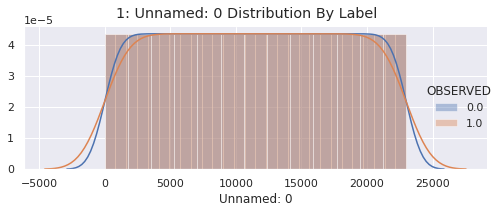

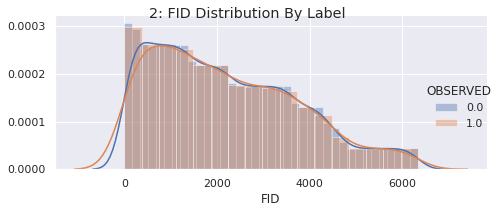

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


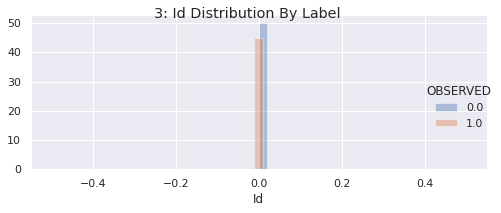

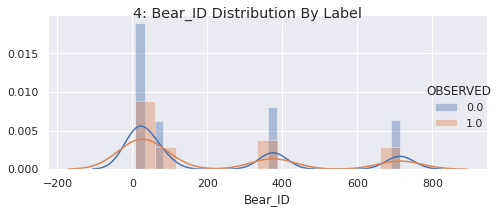

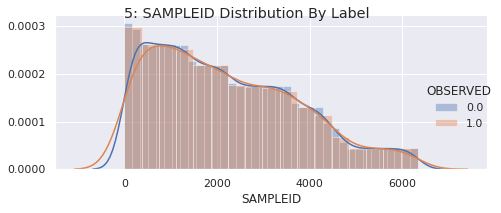

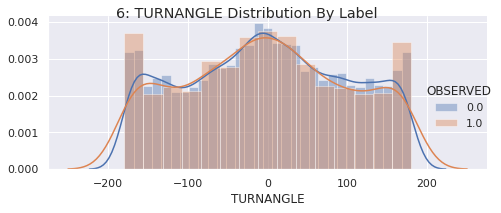

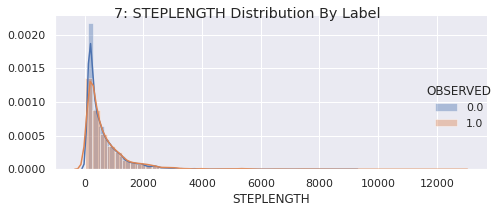

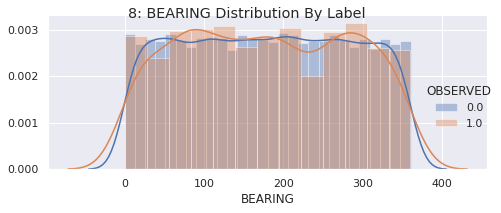

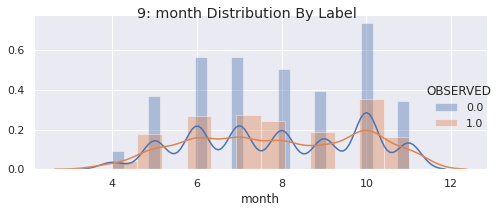

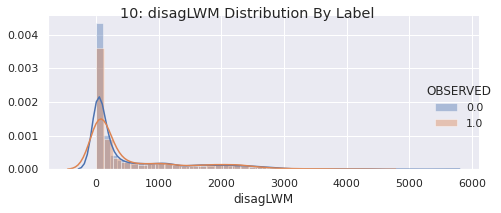

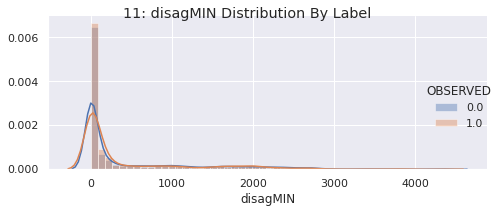

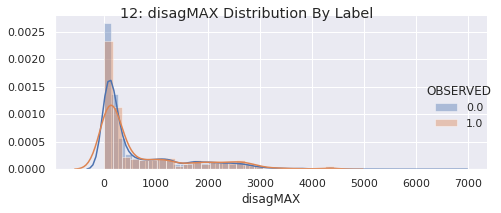

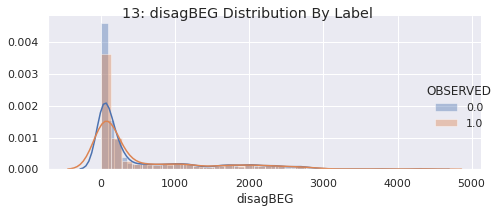

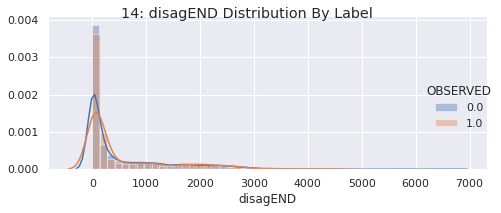

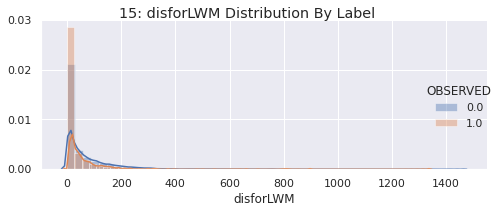

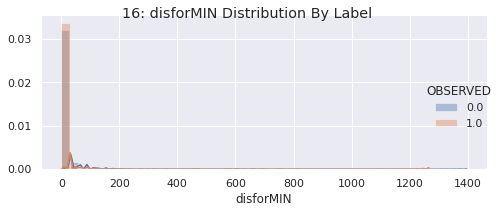

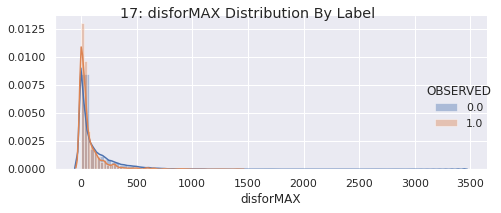

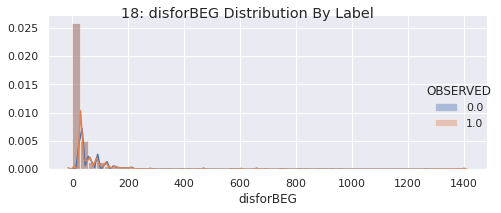

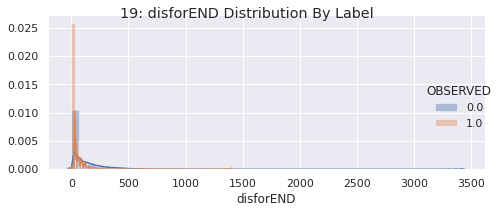

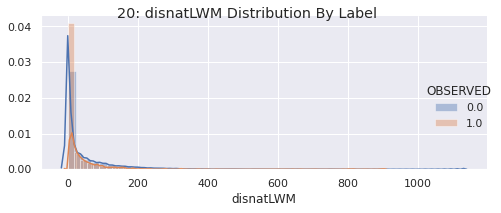

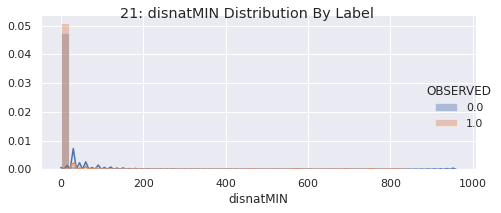

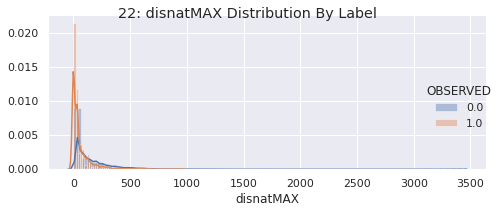

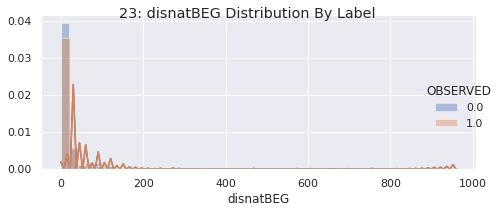

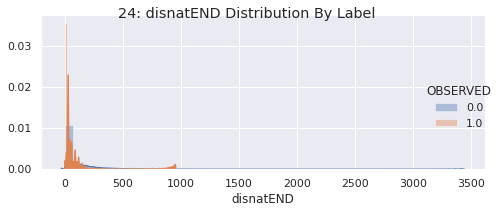

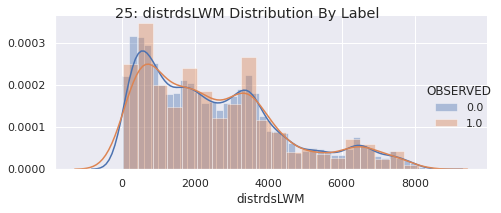

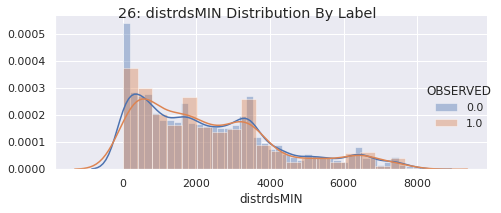

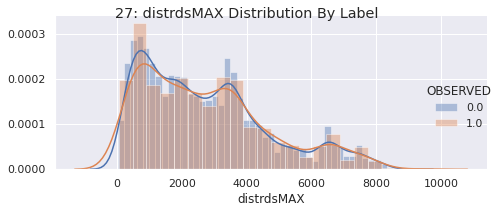

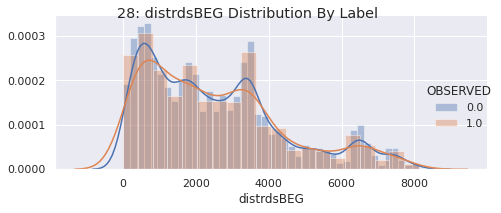

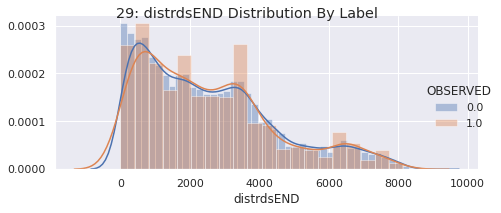

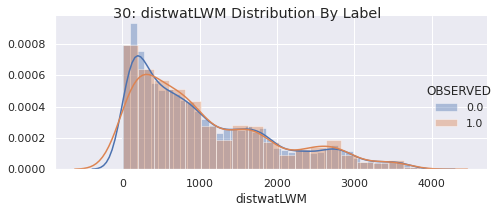

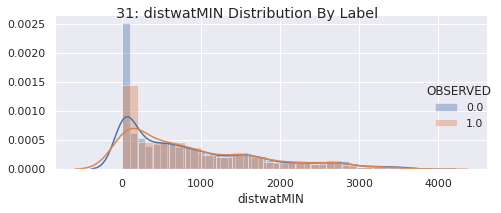

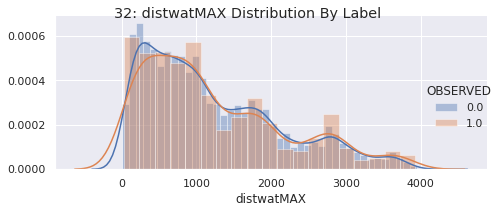

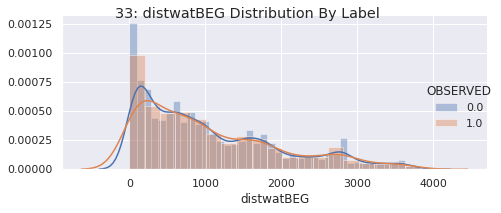

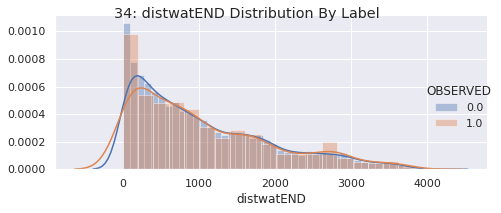

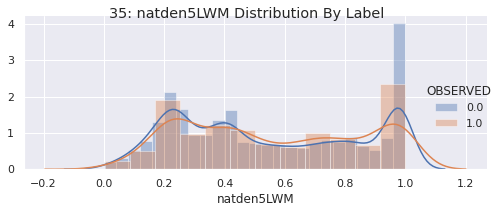

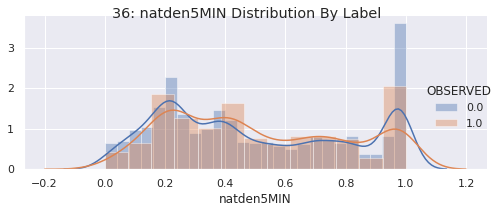

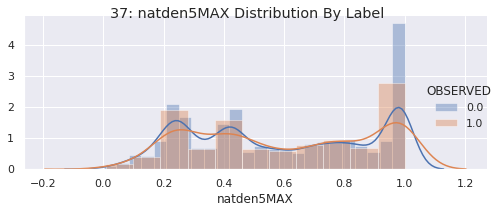

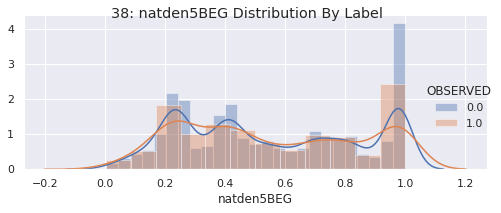

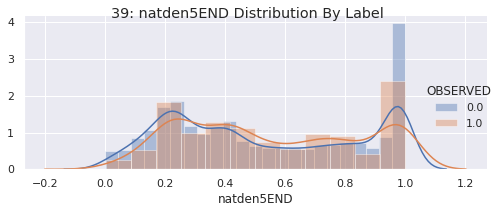

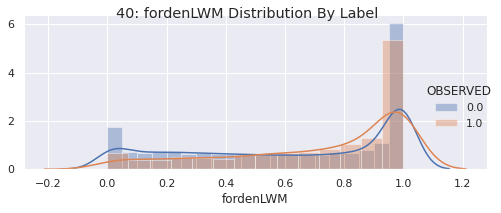

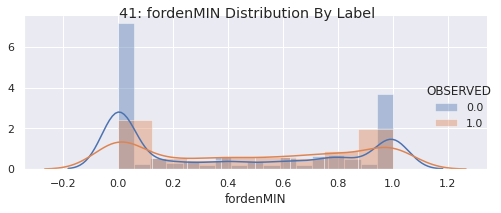

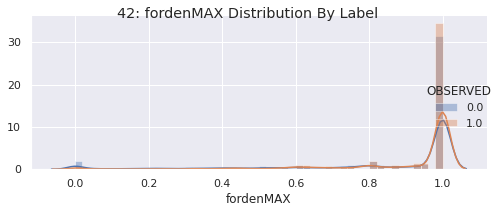

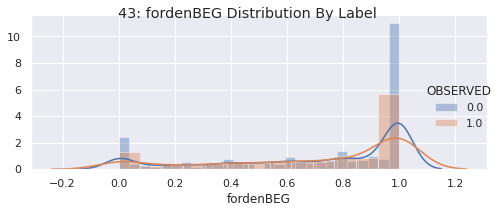

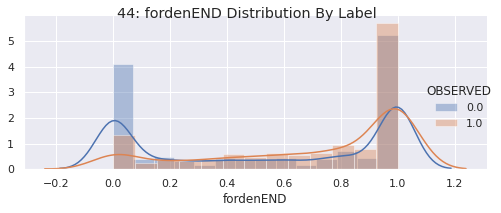

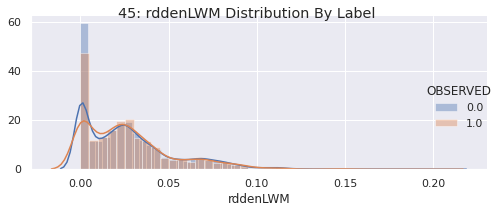

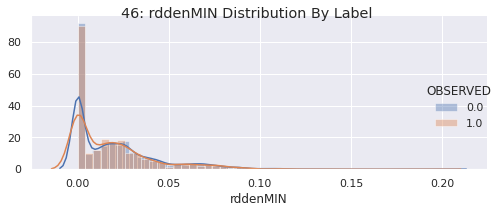

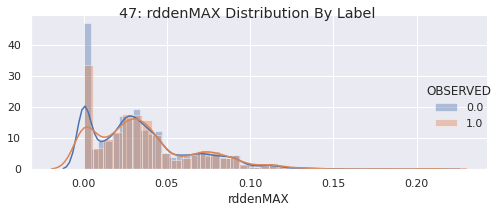

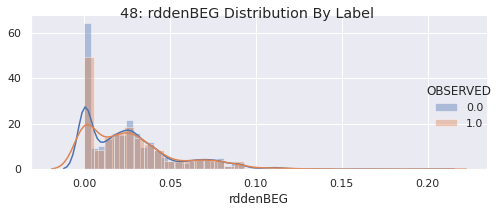

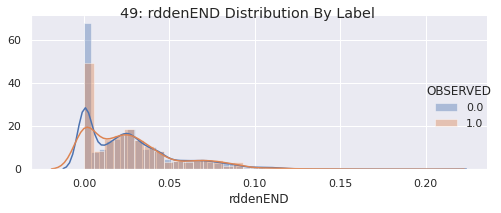

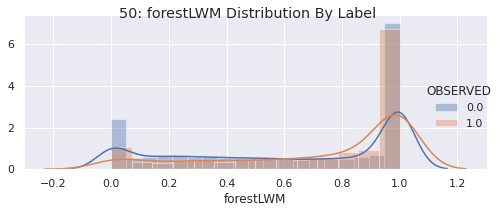

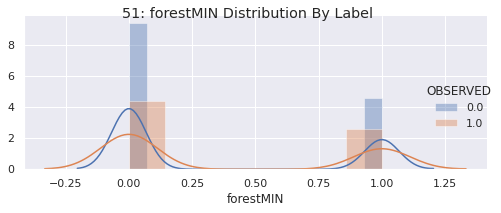

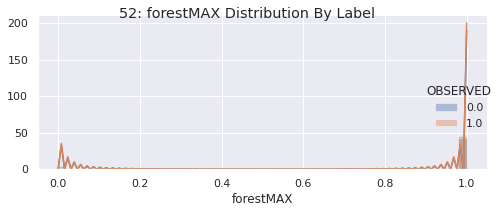

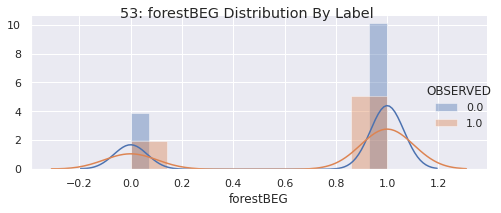

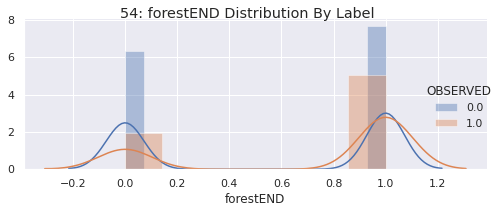

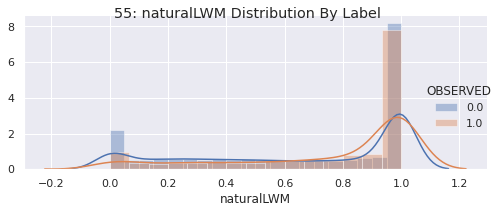

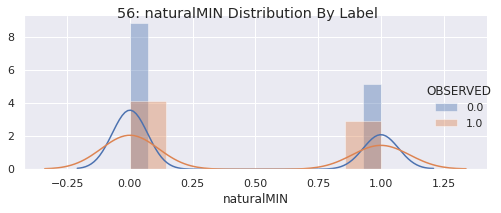

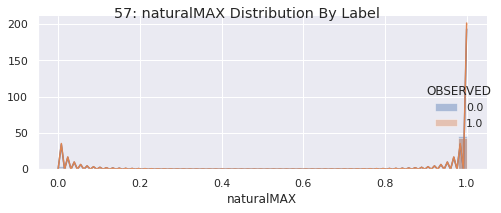

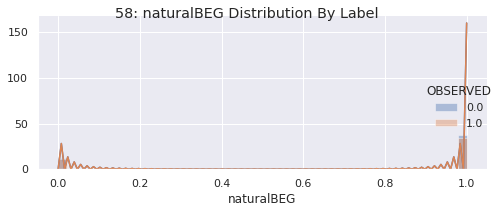

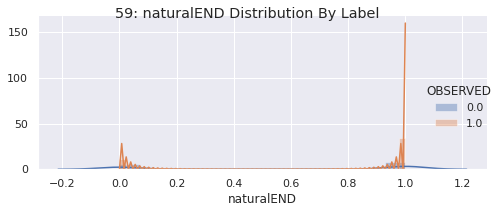

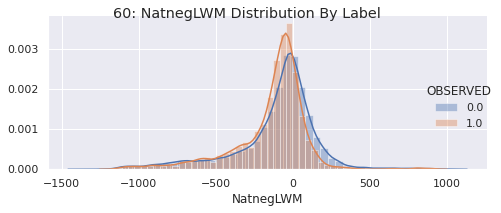

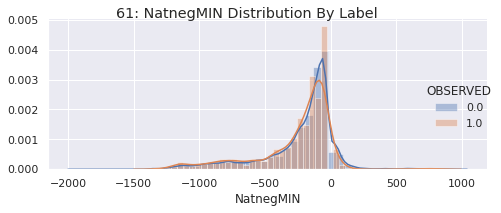

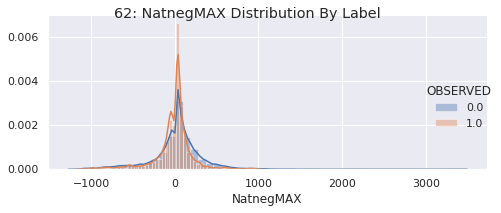

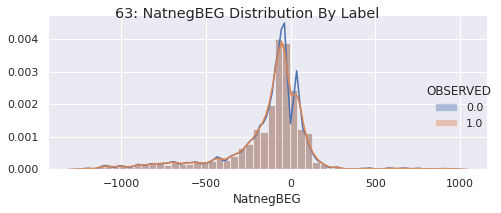

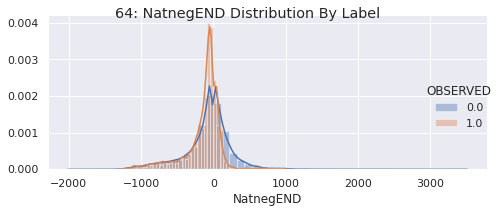

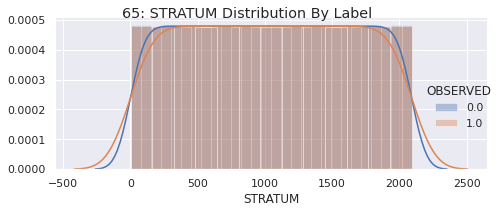

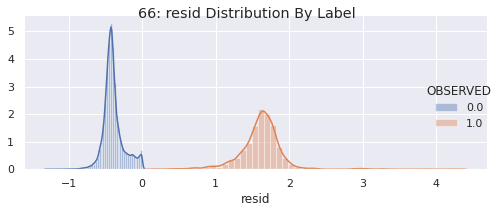

In [9]:
plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(5,5)
colnames=list(female_clean.drop(['OBSERVED'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    facet = sns.FacetGrid(female_clean, hue='OBSERVED',aspect=2)
    facet.map(sns.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
    plt.tight_layout()
    plt.show()

Looking at both male and female data and the distribution of continuous values, we can see that generally there are no glaring differences between the distribution of observed values vs random values outside of the residual data. So for our model, we wouuld likely want to remove residual as it might be overly indicative of performance. 

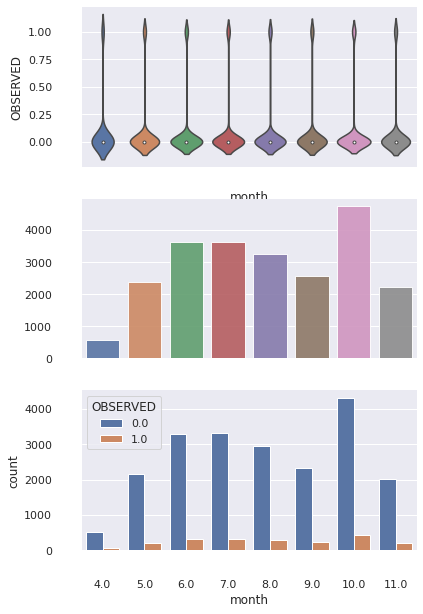

In [10]:
count = female_clean['month'].value_counts()
f, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)
sns.barplot(count.index, count.values, alpha=0.9, ax=axes[1])
sns.violinplot(x="month", y="OBSERVED", data=female_clean, ax=axes[0])
sns.countplot(x = 'month', data = female_clean, hue = 'OBSERVED', ax=axes[2])
sns.despine(offset=20, trim=True)

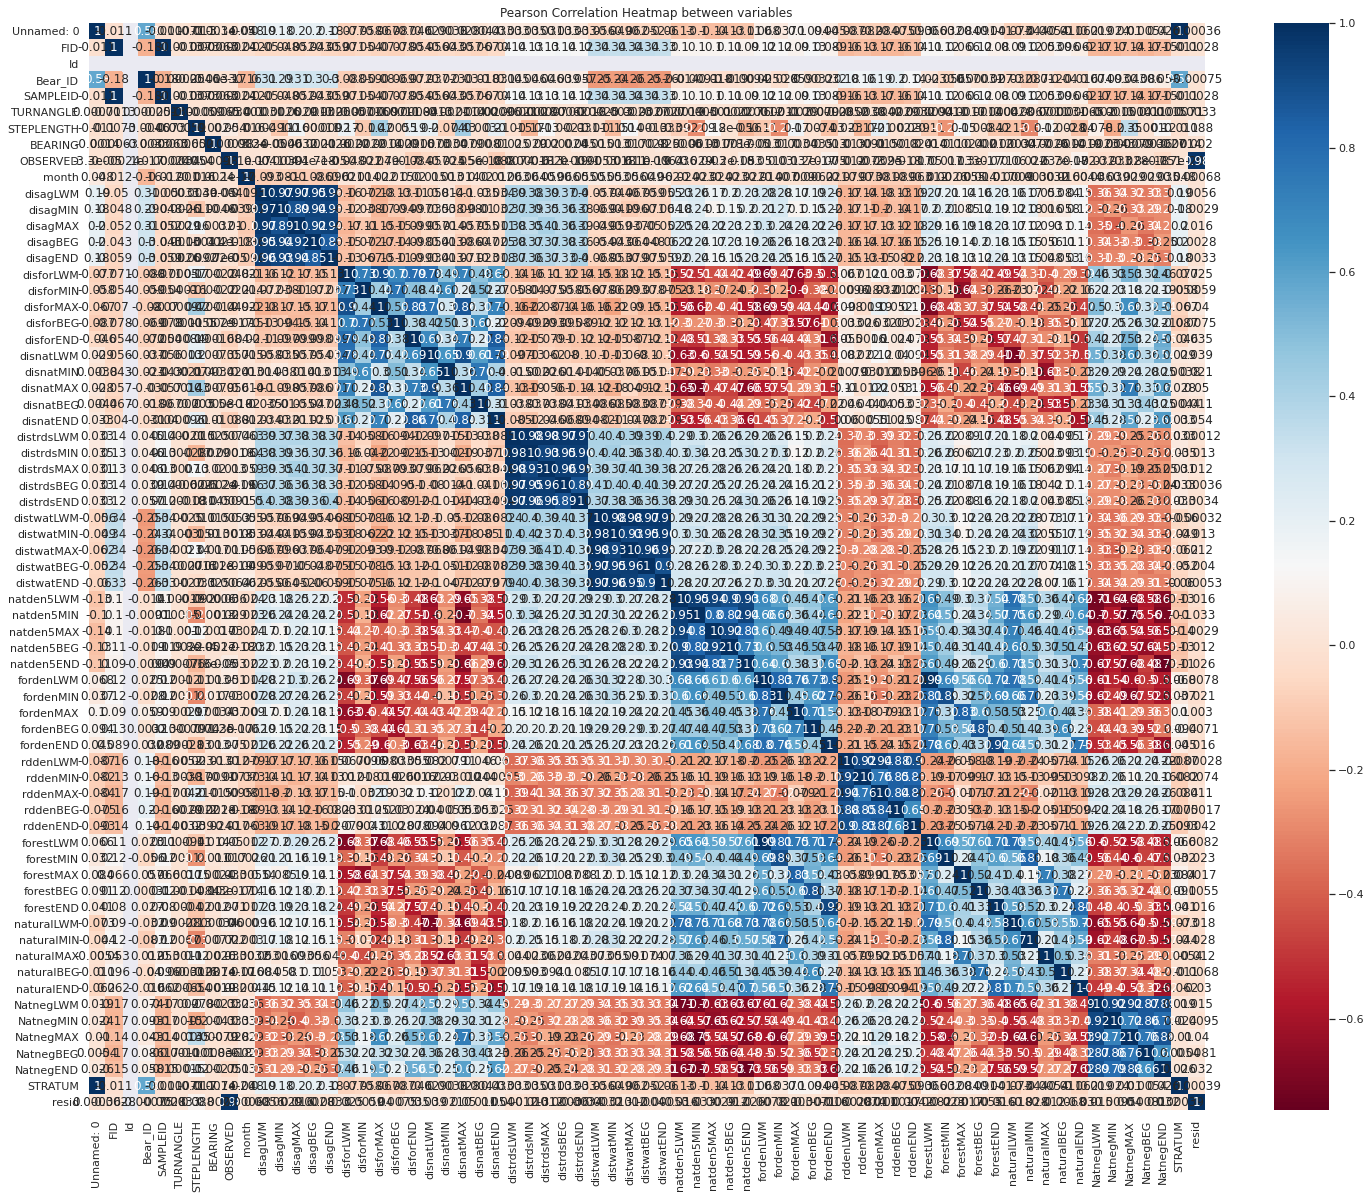

In [11]:
ax, fig = plt.subplots(figsize = (25,20))
sns.set(font_scale=1)
sns.heatmap(male_clean.corr(), annot=True, cmap = 'RdBu') 
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

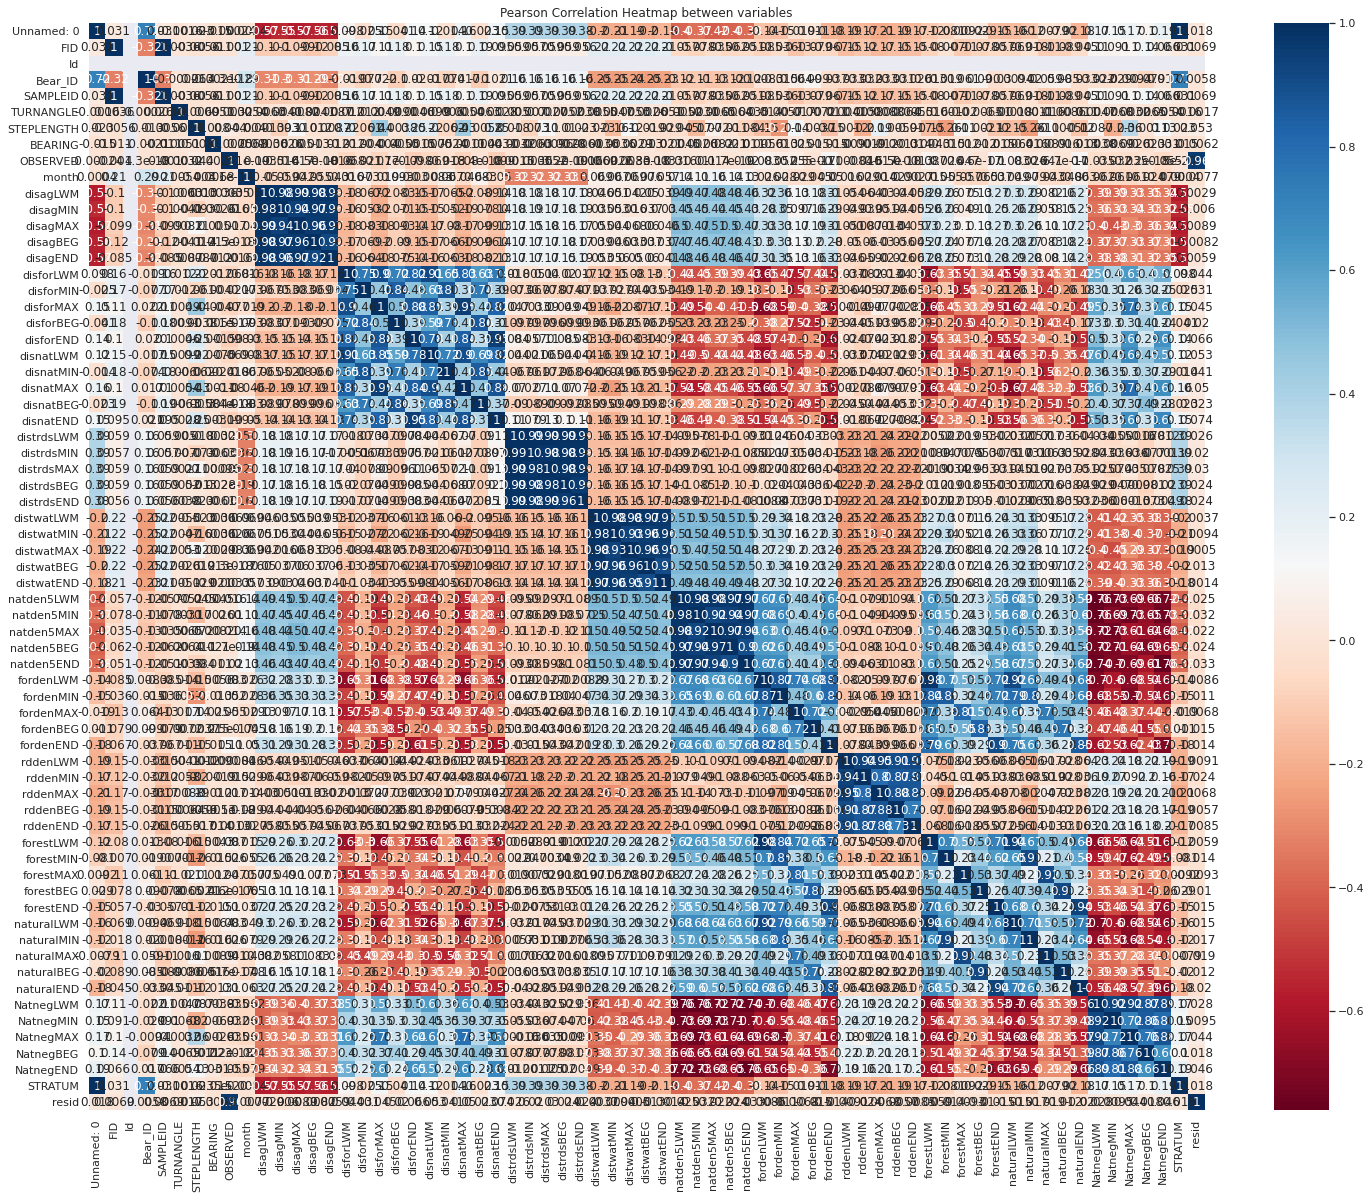

In [12]:

ax, fig = plt.subplots(figsize = (25,20))
sns.set(font_scale=1)
sns.heatmap(female_clean.corr(), annot=True, cmap = 'RdBu') 
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

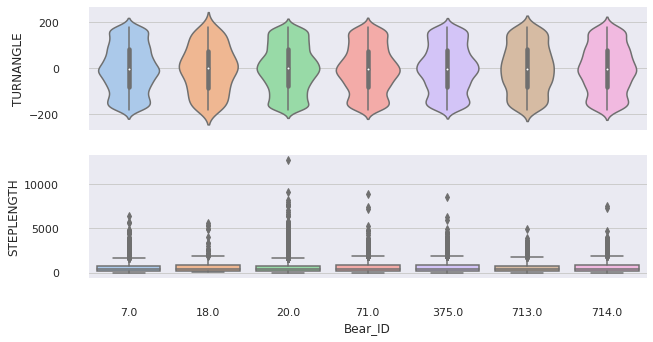

In [13]:

f, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Bear_ID", y="STEPLENGTH", data=female_clean, ax=axes[1])
sns.violinplot(x="Bear_ID", y="TURNANGLE", data=female_clean, ax=axes[0])
sns.despine(offset=20, trim=True)

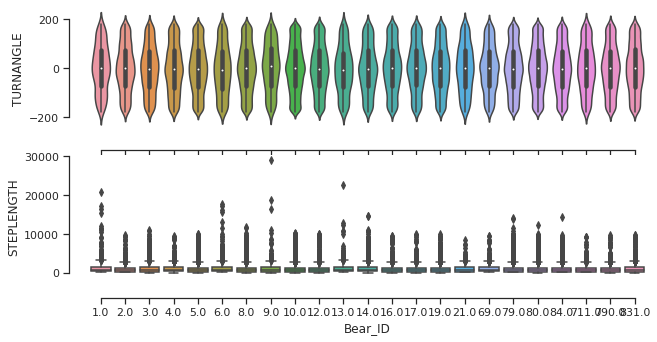

In [14]:
f, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Bear_ID", y="STEPLENGTH", data=male_clean, ax=axes[1])
sns.violinplot(x="Bear_ID", y="TURNANGLE", data=male_clean, ax=axes[0])
sns.despine(offset=20, trim=True)